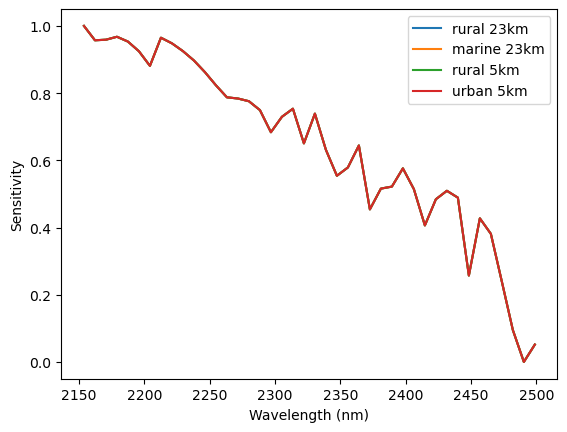

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import sys

sys.path.append("C://Users//RS//VSCode//matchedfiltermethod//src")
from utils.satellites_data import general_functions as gf


satellite_channels = "C://Users//RS//VSCode//matchedfiltermethod//src//data//satellite_channels//AHSI_channels.npz"


def satellite_channels_sensitivity_analyse(basepath, filepath_list: list, low, high):
    base_radiance = None
    diff_list = []
    wvls, base_radiance = wvls, base_radiance = gf.get_simulated_satellite_radiance(
        basepath, satellite_channels, low, high
    )
    for file_path in filepath_list:
        _, radiance_data = gf.get_simulated_satellite_radiance(
            file_path, satellite_channels, low, high
        )
        diff_list.append(radiance_data)
    return wvls, np.array(diff_list)


def original_bands_sensitivity_analyse(basepath, filepath_list: list, low, high):
    base_radiance = None
    diff_list = []
    wvls, base_radiance = gf.read_simulated_radiance(basepath)
    wvls, base_radiance = gf.slice_data(wvls, base_radiance, low, high)
    for file_path in filepath_list:
        wvls, radiance_data = gf.read_simulated_radiance(
            file_path
        )
        wvls, radiance_data = gf.slice_data(wvls, radiance_data, low, high)
        from matplotlib import pyplot as plt
        plt.plot(wvls, radiance_data)
        plt.plot(wvls, base_radiance)
        plt.show()
        diff_list.append((radiance_data - base_radiance)/ base_radiance)
    
    return wvls, np.array(diff_list)


def max_min_standardization(data: np.ndarray):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


def show_radiance_graph(basepath, filepath_list: list, low, high):
    base_radiance = None
    fig, axes = plt.subplots()
    wvls, base_radiance = gf.read_simulated_radiance(basepath)
    wvls, base_radiance = gf.slice_data(wvls, base_radiance, low, high)
    axes.plot(wvls, base_radiance)

    for file_path in filepath_list:
        # _, radiance_data = gf.get_simulated_satellite_radiance(
        #     file_path, satellite_channels, low, high
        # )
        wvls, radiance_data = gf.read_simulated_radiance(file_path)
        wvls, radiance_data = gf.slice_data(wvls, radiance_data, low, high)
        # 计算差异并存储
        axes.plot(wvls, radiance_data)
    plt.show()
    

def show_diff_graphes(wvls, diff_list, standardized_diff_list,low, high):
    fig, axes = plt.subplots(2, 1)
    # 假设我们想筛选波长在min_wvl和max_wvl之间的部分
    min_wvl = low  # 最小波长（例如）
    max_wvl = high # 最大波长（例如）

    # 筛选出满足条件的波长索引
    selected_indices = (wvls >= min_wvl) & (wvls <= max_wvl)
    for i in range(len(standardized_diff_list)):
        axes[0].plot(wvls[selected_indices], diff_list[i][selected_indices])
    for i in range(len(standardized_diff_list)):
        axes[1].plot(
            wvls[selected_indices], standardized_diff_list[i][selected_indices]
        )
    plt.show()


def watervapor_sensitivity_analysis():
    # 敏感性分析的基准
    base_path = "C://PcModWin5//bin//batch_result//sensitivity_analysis//sensitivity_base_tape7.txt"
    # 读取不同水汽浓度的辐射数据 1，2，3，4，5, 6 g/cm^2
    filepath_list = [
        f"C://PcModWin5//bin//batch_result//sensitivity_analysis//wv_{int(i)}_tape7.txt"
        for i in np.linspace(1, 6, 6)
    ]
    
    # 计算敏感性分析
    wvls, diff_list = satellite_channels_sensitivity_analyse(
        base_path, filepath_list, 2150,2500
    )
    # wvls, diff_list = satellite_channels_sensitivity_analyse(
    #     base_path, filepath_list, 1600,1800
    # )
    
    normalized_diff_list = max_min_standardization(diff_list)
    print(diff_list[0])
    print(normalized_diff_list[0])
    from matplotlib import pyplot as plt
    plt.figure()
    for i in range(normalized_diff_list.shape[0]):
        plt.plot(wvls, normalized_diff_list[i],label = f"wv_{i+1}")
    plt.legend()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Sensitivity")
    plt.show()
    return wvls, diff_list, normalized_diff_list


def aerosol_sensitivity_analysis():
    base_path = "C://PcModWin5//bin//batch_result//sensitivity_analysis//sensitivity_base_tape7.txt"
    # 1 for rural 23km 2 for marine 23km 3 for rural 5km 4 for urban 5km
    filepath_folder = [
        f"C://PcModWin5//bin//batch_result//sensitivity_analysis//aerosol_{int(i)}_tape7.txt"
        for i in np.linspace(1, 4, 4)
    ]
    # 计算敏感性分析
    wvls, diff_list = satellite_channels_sensitivity_analyse(
        base_path, filepath_folder, 2150, 2500
    )
    
    normalized_diff_list = max_min_standardization(diff_list)
    aerosol_model = ["rural 23km", "marine 23km", "rural 5km", "urban 5km"]
    from matplotlib import pyplot as plt
    plt.figure()
    for i in range(normalized_diff_list.shape[0]):
        plt.plot(wvls, normalized_diff_list[i],label = aerosol_model[i])
    plt.legend()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Sensitivity")
    plt.show()
    return wvls, diff_list, normalized_diff_list


def albedo_sensitivity_analysis():
    base_path = "C://PcModWin5//bin//batch_result//sensitivity_analysis//albedo_20_tape7.txt"
    filepath_folder = [
        f"C://PcModWin5//bin//batch_result//sensitivity_analysis//albedo_{int(i)}_tape7.txt"
        for i in np.linspace(20, 60, 5)
    ]
    # 计算敏感性分析
    # wvls, diff_list = original_bands_sensitivity_analyse(
    #     base_path, filepath_folder, 1600,1800
    # )
    
    wvls, diff_list = satellite_channels_sensitivity_analyse(
        base_path, filepath_folder, 2150,2500
    )
    
    normalized_diff_list = max_min_standardization(diff_list)
    from matplotlib import pyplot as plt
    plt.figure()
    for i in range(normalized_diff_list.shape[0]):
        plt.plot(wvls, normalized_diff_list[i],label = f"albedo_{20+i*10}")
    plt.legend()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Sensitivity")

    plt.show()
    return wvls, diff_list, normalized_diff_list


def co2_sensitivity_analysis():
    base_path = "C://PcModWin5//bin//batch_result//sensitivity_analysis//co2_420_tape7.txt"
    filepath_folder = [
        f"C://PcModWin5//bin//batch_result//sensitivity_analysis//co2_{int(i)}_tape7.txt"
        for i in np.linspace(430, 460, 4)
    ]
    wvls, diff_list = satellite_channels_sensitivity_analyse(
        base_path, filepath_folder, 2150, 2500
    )
    normalized_diff_list = max_min_standardization(diff_list)
    from matplotlib import pyplot as plt
    plt.figure()
    for i in range(normalized_diff_list.shape[0]):
        plt.plot(wvls, normalized_diff_list[i],label = f"co2_{430+i*10}")
    plt.legend()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Sensitivity")
    plt.show()
    return wvls, diff_list, normalized_diff_list

    
def ch4_sensitivity_analysis():
    base_path = "C://PcModWin5//bin//batch_result//sensitivity_analysis//ch4_1_tape7.txt"
    filepath_folder = [
        f"C://PcModWin5//bin//batch_result//sensitivity_analysis//ch4_{int(i)}_tape7.txt"
        for i in np.linspace(2, 6, 5)
    ]
    wvls, diff_list = satellite_channels_sensitivity_analyse(
        base_path, filepath_folder, 2150, 2500
    )
    normalized_diff_list = max_min_standardization(diff_list)

    from matplotlib import pyplot as plt
    plt.figure()
    for i in range(normalized_diff_list.shape[0]):
        plt.plot(wvls, normalized_diff_list[i],lable = f"ch4_{i+1}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Sensitivity")
    plt.legend()
    plt.show()
    return wvls, diff_list, normalized_diff_list


if __name__ == "__main__":
    watervapor_sensitivity_analysis()
    # aerosol_sensitivity_analysis()
    # albedo_sensitivity_analysis()
    # co2_sensitivity_analysis()
    # ch4_sensitivity_analysis()